In [50]:
import pandas as pd
import numpy as np
import warnings
import math
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
df = pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
df.shape

(908, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
df.dropna(inplace=True)


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,53.420118,132.428402,202.633136,137.190533,0.892308,0.978698
std,9.103269,19.245573,111.718779,25.615095,1.094092,1.128905
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


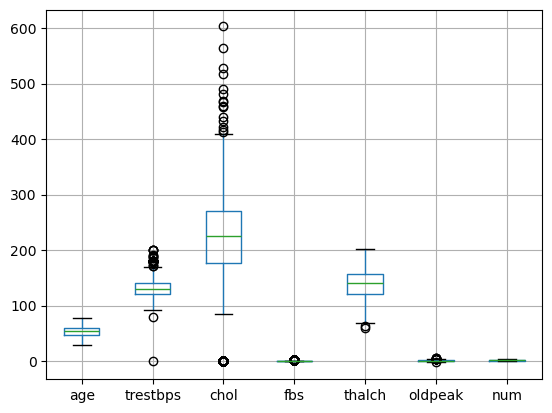

In [13]:
df.boxplot()
plt.show()

In [14]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-(IQR*1.5)
    upper_extreme=Q3+(IQR*1.5)
    df[column]=df[column].apply(lambda x:lower_extreme if x< lower_extreme else upper_extreme if x> upper_extreme else x)
for col in df.select_dtypes(['int','float']):
    outlier_capping(df,col)

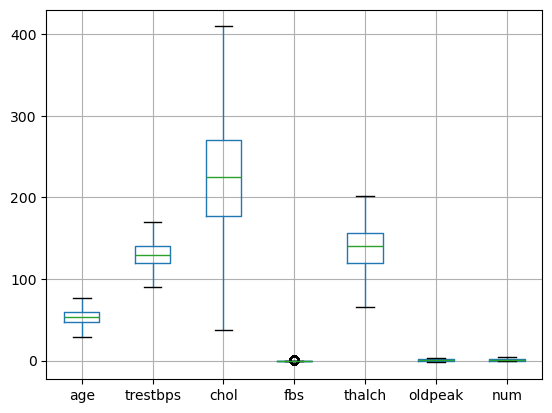

In [15]:
df.boxplot()
plt.show()

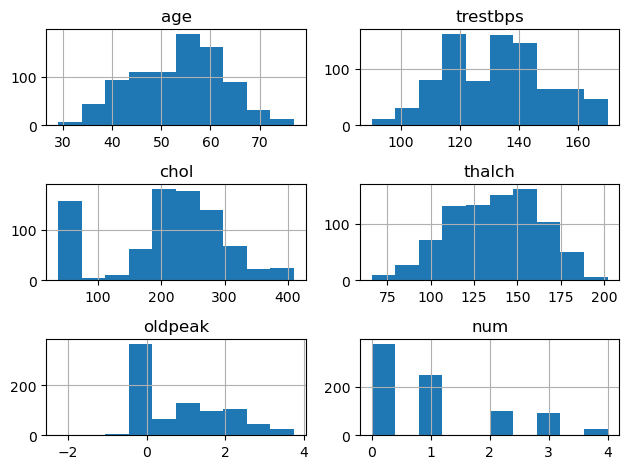

In [16]:
df.hist()
plt.tight_layout()
plt.show()

In [17]:
df.nunique()

age          49
sex           2
cp            4
trestbps     53
chol        205
fbs           2
restecg       3
thalch      117
exang         3
oldpeak      47
slope         3
thal          3
num           5
dtype: int64

In [ ]:
fea=df[['sex','cp','fbs','restecg','exang','slope','thal']]
fea.head()

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,atypical angina,False,normal,False,flat,fixed defect
2,Male,asymptomatic,False,normal,False,flat,fixed defect
3,Male,typical angina,False,lv hypertrophy,False,flat,fixed defect
4,Male,asymptomatic,False,normal,True,flat,fixed defect


In [19]:
le=LabelEncoder()

In [20]:
for col in df.select_dtypes(include=['object','bool']).columns:
    df[col]=le.fit_transform(df[col].astype(str))
    

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,1,2.3,0,0,0
1,41,1,1,135.0,203.0,0,1,132.0,1,0.0,1,0,0
2,57,1,0,140.0,192.0,0,1,148.0,1,0.4,1,0,0
3,52,1,3,118.0,186.0,0,0,190.0,1,0.0,1,0,0
4,57,1,0,110.0,201.0,0,1,126.0,2,1.5,1,0,0


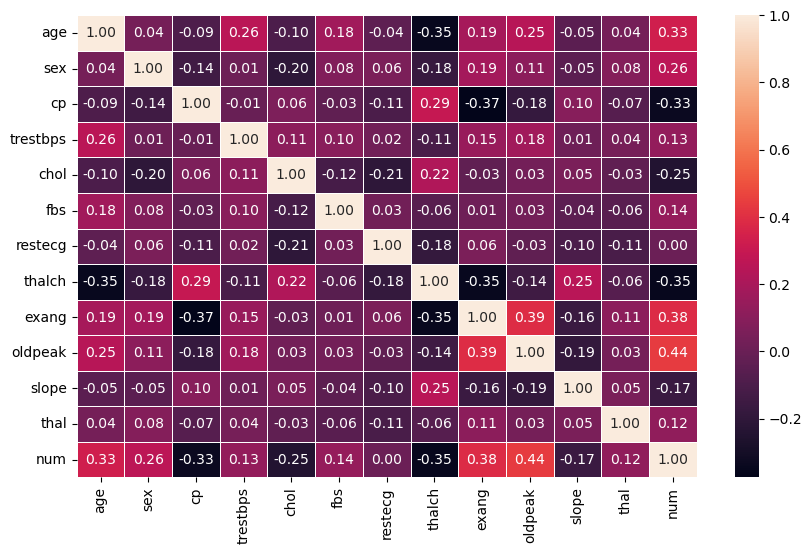

In [22]:
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,linewidth=0.7,fmt='.2f')
plt.show()

In [23]:
target=df[['num']]
feature=df.drop(columns='num')

In [24]:
feature.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145.0,233.0,1,0,150.0,1,2.3,0,0
1,41,1,1,135.0,203.0,0,1,132.0,1,0.0,1,0
2,57,1,0,140.0,192.0,0,1,148.0,1,0.4,1,0
3,52,1,3,118.0,186.0,0,0,190.0,1,0.0,1,0
4,57,1,0,110.0,201.0,0,1,126.0,2,1.5,1,0


In [25]:
min_max=MinMaxScaler()
features=min_max.fit_transform(feature)
featuress=pd.DataFrame(features,columns=feature.columns)
featuress.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,0.708333,1.0,1.000000,0.6875,0.525538,1.0,0.0,0.617647,0.5,0.758333,0.0,0.0
1,0.250000,1.0,0.333333,0.5625,0.444892,0.0,0.5,0.485294,0.5,0.375000,0.5,0.0
2,0.583333,1.0,0.000000,0.6250,0.415323,0.0,0.5,0.602941,0.5,0.441667,0.5,0.0
3,0.479167,1.0,1.000000,0.3500,0.399194,0.0,0.0,0.911765,0.5,0.375000,0.5,0.0
4,0.583333,1.0,0.000000,0.2500,0.439516,0.0,0.5,0.441176,1.0,0.625000,0.5,0.0


In [26]:
x_train,x_test,y_train,y_test=train_test_split(featuress,target,test_size=0.2,random_state=100,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(676, 12)
(169, 12)
(676, 1)
(169, 1)


In [27]:
dec=DecisionTreeClassifier(max_depth=3,min_samples_split=4,criterion='gini')

In [28]:
dec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=4)

In [29]:
ypred=dec.predict(x_train)
accuracy_score(y_train,ypred)

0.6050295857988166

In [30]:
ypred1=dec.predict(x_test)
accuracy_score(y_test,ypred1)

0.5621301775147929

In [31]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77        76
           1       0.41      0.56      0.47        50
           2       0.25      0.05      0.08        20
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         5

    accuracy                           0.56       169
   macro avg       0.27      0.30      0.26       169
weighted avg       0.46      0.56      0.49       169



In [32]:
sigmoid=dec.predict_proba(x_test)

In [33]:
roc_auc_score(y_test,sigmoid,multi_class='ovr')

0.7341661623255251

In [34]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4,8]
}

In [35]:
grid = GridSearchCV(
    estimator=dec,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

In [36]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_split=4),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [2, 4, 8]},
             scoring='accuracy')

In [37]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 4}


In [38]:
best_model = grid.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4)

In [39]:
y_pred2=best_model.predict(x_test)
accuracy_score(y_pred2,y_test)

0.5443786982248521

In [44]:
sig=best_model.predict_proba(x_test)

In [46]:
roc_auc_score(y_test,sig,multi_class='ovr')

0.6534566976186843

In [49]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76        76
           1       0.45      0.44      0.44        50
           2       0.00      0.00      0.00        20
           3       0.40      0.22      0.29        18
           4       0.00      0.00      0.00         5

    accuracy                           0.54       169
   macro avg       0.30      0.31      0.30       169
weighted avg       0.48      0.54      0.50       169



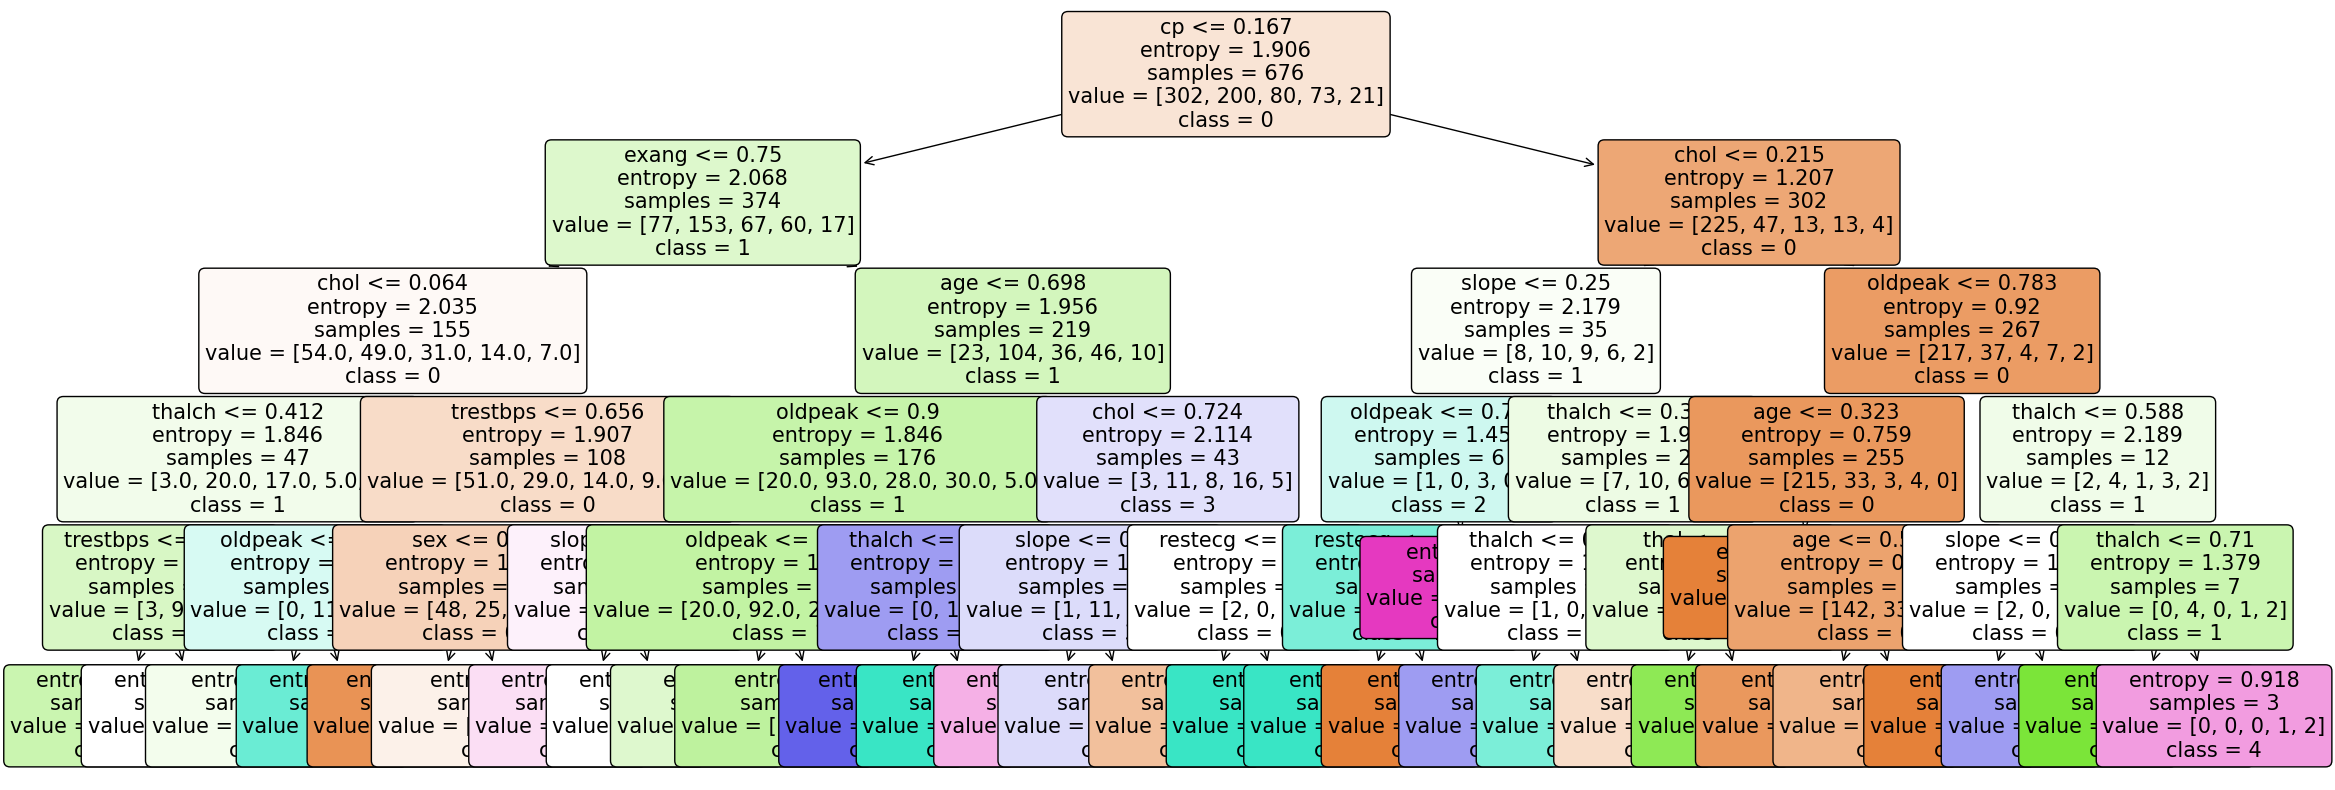

In [57]:
plt.figure(figsize=(28, 10))   
plot_tree(
    best_model,
    filled=True,              
    feature_names=featuress.columns,   
    class_names=[str(c) for c in best_model.classes_],
    rounded=True,             
    fontsize=15
)
plt.show()

# Interview Questions

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Decision Tree models use hyperparameters to control complexity and performance. The criterion defines how splits are measured, while max_depth limits tree growth to prevent overfitting. min_samples_split and min_samples_leaf restrict splitting and leaf size for better generalization. max_features limits features considered per split, adding randomness. Tuning these parameters balances bias and variance for optimal accuracy.

## 2. What is the difference between the Label encoding and One-hot encoding?

Label encoding and One-hot encoding are techniques used to convert categorical data into numerical form. Label encoding assigns a unique number to each category, which can unintentionally introduce an order between them. In contrast, One-hot encoding creates separate binary columns for each category, representing the presence (1) or absence (0) of that category. While label encoding is simpler and uses less memory, one-hot encoding avoids implying any ordinal relationship and is better for algorithms sensitive to numerical order.